In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# EDA

**Resort 1** is close to a large metropolitan area (approx 455,000 people). The resort's lift capacity is 9,980 riders/hour. 

The resort generously gave us four seasons' worth of daily visit totals in an excel document. The daily visits were further broken down into season pass holder visits vs day ticket visits, day vs night vists. 

A couple notes on getting the data for this particular ski area: 

* `SCHOOL_OUT` is if the public school district did not have class on a day that normally would have school (weekday). These included Winter Break, MLK Day, Presidents' Day, and Spring Break. Weekends surrounding school closures such as Thanksgiving, Presidents Day, were not counted as a school out day. I was able to source this from the local school district's website. 

* Mountain Weather Data was gathered from a NOAA weather station on the mountain where the resort is located.

* Town weather Data was gathered from the metropolitan area's airport. 

### After cleaning stats: 

**Daily Visits:**

count     484.000000

mean     2421.783058

std      1709.932584

min        48.00000

25%      1037.500000

50%      2015.500000

75%      3503.500000

max      7144.000000

In [2]:
df_1 = pd.read_csv('Data/Resort_1.csv', thousands=',')

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 567 non-null    object 
 1   Day of week          567 non-null    object 
 2   is_school_out        567 non-null    int64  
 3   is_holiday           567 non-null    int64  
 4   Day Tickets          567 non-null    int64  
 5   Night Ticket         534 non-null    float64
 6   Total Ticket         567 non-null    int64  
 7   SP Day               428 non-null    float64
 8   SP Night             403 non-null    float64
 9   Total SP             567 non-null    float64
 10  Total VIsits Alpine  567 non-null    float64
 11  T - AWND             567 non-null    float64
 12  T - PRCP             567 non-null    float64
 13  T - SNOW             567 non-null    float64
 14  T - SNWD             567 non-null    float64
 15  T - TAVG             567 non-null    int

In [4]:
#Date dealings - make the 'Date' column a datetime object, create day of week and month category to do some EDA and use as variables
#make the 'Date' Column a datetime type
df_1['Date'] = pd.to_datetime(df_1['Date'])

#The day_of_week_num column created with Monday=0, Sunday=6. Weekends = 5 & 6, Friday = 4
df_1['day_of_week_num'] = df_1['Date'].dt.dayofweek

#creating Month Column
df_1['month'] = df_1['Date'].dt.month

#no need for day of week column in a string anymore
df_1.drop(['Day of week'], axis=1, inplace = True)

df_1['month'].value_counts()

3     124
1     124
12    119
2     113
4      50
11     37
Name: month, dtype: int64

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 567 non-null    datetime64[ns]
 1   is_school_out        567 non-null    int64         
 2   is_holiday           567 non-null    int64         
 3   Day Tickets          567 non-null    int64         
 4   Night Ticket         534 non-null    float64       
 5   Total Ticket         567 non-null    int64         
 6   SP Day               428 non-null    float64       
 7   SP Night             403 non-null    float64       
 8   Total SP             567 non-null    float64       
 9   Total VIsits Alpine  567 non-null    float64       
 10  T - AWND             567 non-null    float64       
 11  T - PRCP             567 non-null    float64       
 12  T - SNOW             567 non-null    float64       
 13  T - SNWD             567 non-null  

In [6]:
df_1.rename(columns = {'Total VIsits Alpine':'TOTAL_VISITS'}, inplace = True)

In [7]:
df_1.isnull().sum()

Date                 0
is_school_out        0
is_holiday           0
Day Tickets          0
Night Ticket        33
Total Ticket         0
SP Day             139
SP Night           164
Total SP             0
TOTAL_VISITS         0
T - AWND             0
T - PRCP             0
T - SNOW             0
T - SNWD             0
T - TAVG             0
T - TMAX             0
T - TMIN             0
T - WSF2             0
T - WSF5             0
M_PRCP               0
M_SNWD               0
M_TAVG               0
M_TMAX               0
M_TMIN               0
M_TOBS               0
M_WESD               0
day_of_week_num      0
month                0
dtype: int64

# Correlation Matrix 
Let's start exploring correlation, taking out `TOTAL_VISITS` (our target), SP, Day and Night related ticket totals to see if any of our variables are highly correlated. Also taking out `Date` as the specific date is not a predictor. 


In [8]:
#removing columns for correlation testing

df_1_corr = df_1.drop(columns=['Date', 'TOTAL_VISITS'])
df_1_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   is_school_out    567 non-null    int64  
 1   is_holiday       567 non-null    int64  
 2   Day Tickets      567 non-null    int64  
 3   Night Ticket     534 non-null    float64
 4   Total Ticket     567 non-null    int64  
 5   SP Day           428 non-null    float64
 6   SP Night         403 non-null    float64
 7   Total SP         567 non-null    float64
 8   T - AWND         567 non-null    float64
 9   T - PRCP         567 non-null    float64
 10  T - SNOW         567 non-null    float64
 11  T - SNWD         567 non-null    float64
 12  T - TAVG         567 non-null    int64  
 13  T - TMAX         567 non-null    int64  
 14  T - TMIN         567 non-null    int64  
 15  T - WSF2         567 non-null    float64
 16  T - WSF5         567 non-null    float64
 17  M_PRCP          

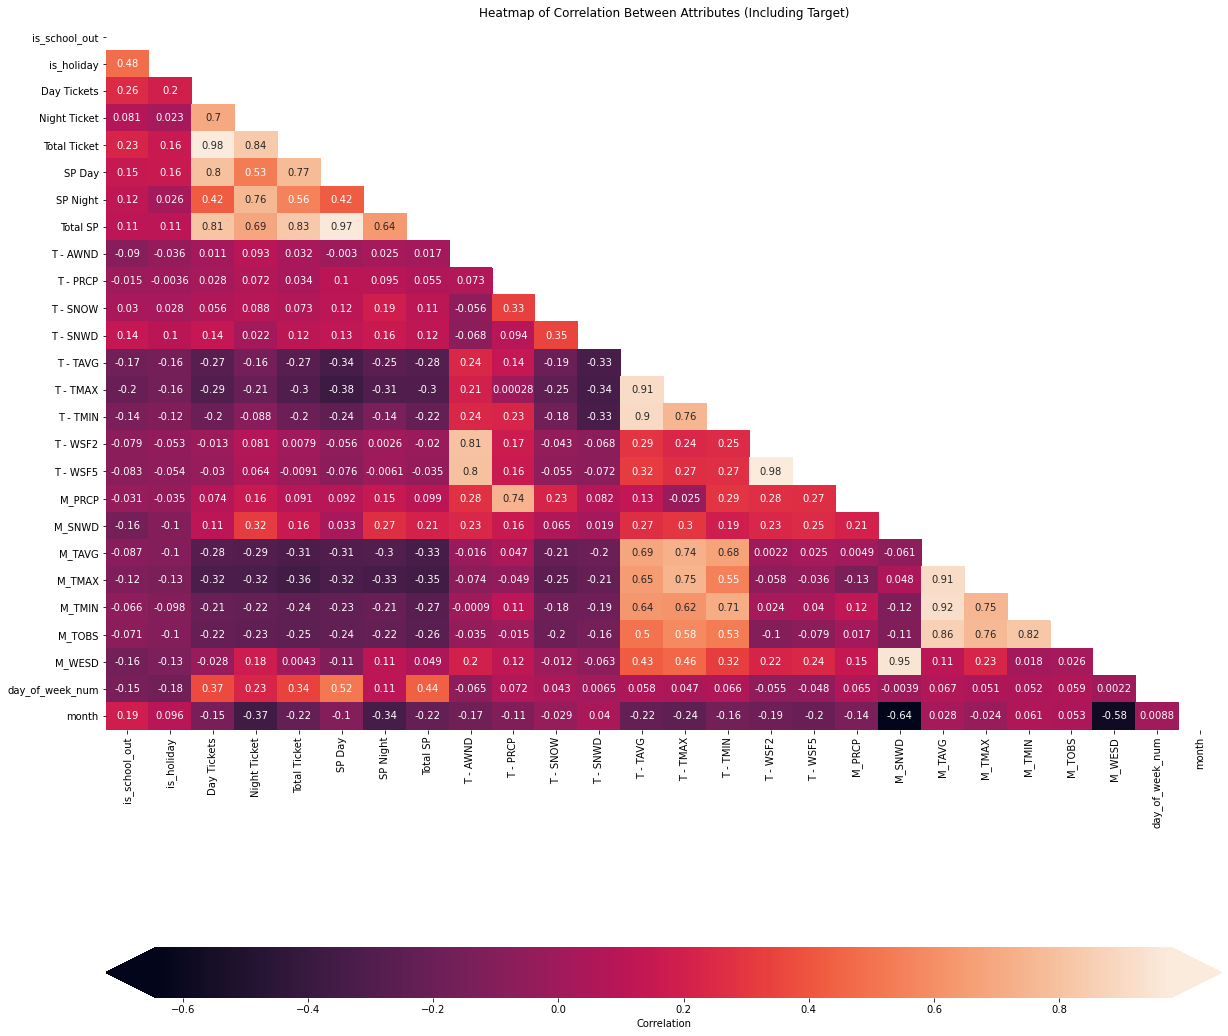

In [11]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = df_1_corr
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 20))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)), ax=ax, annot=True, 
            cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"})

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

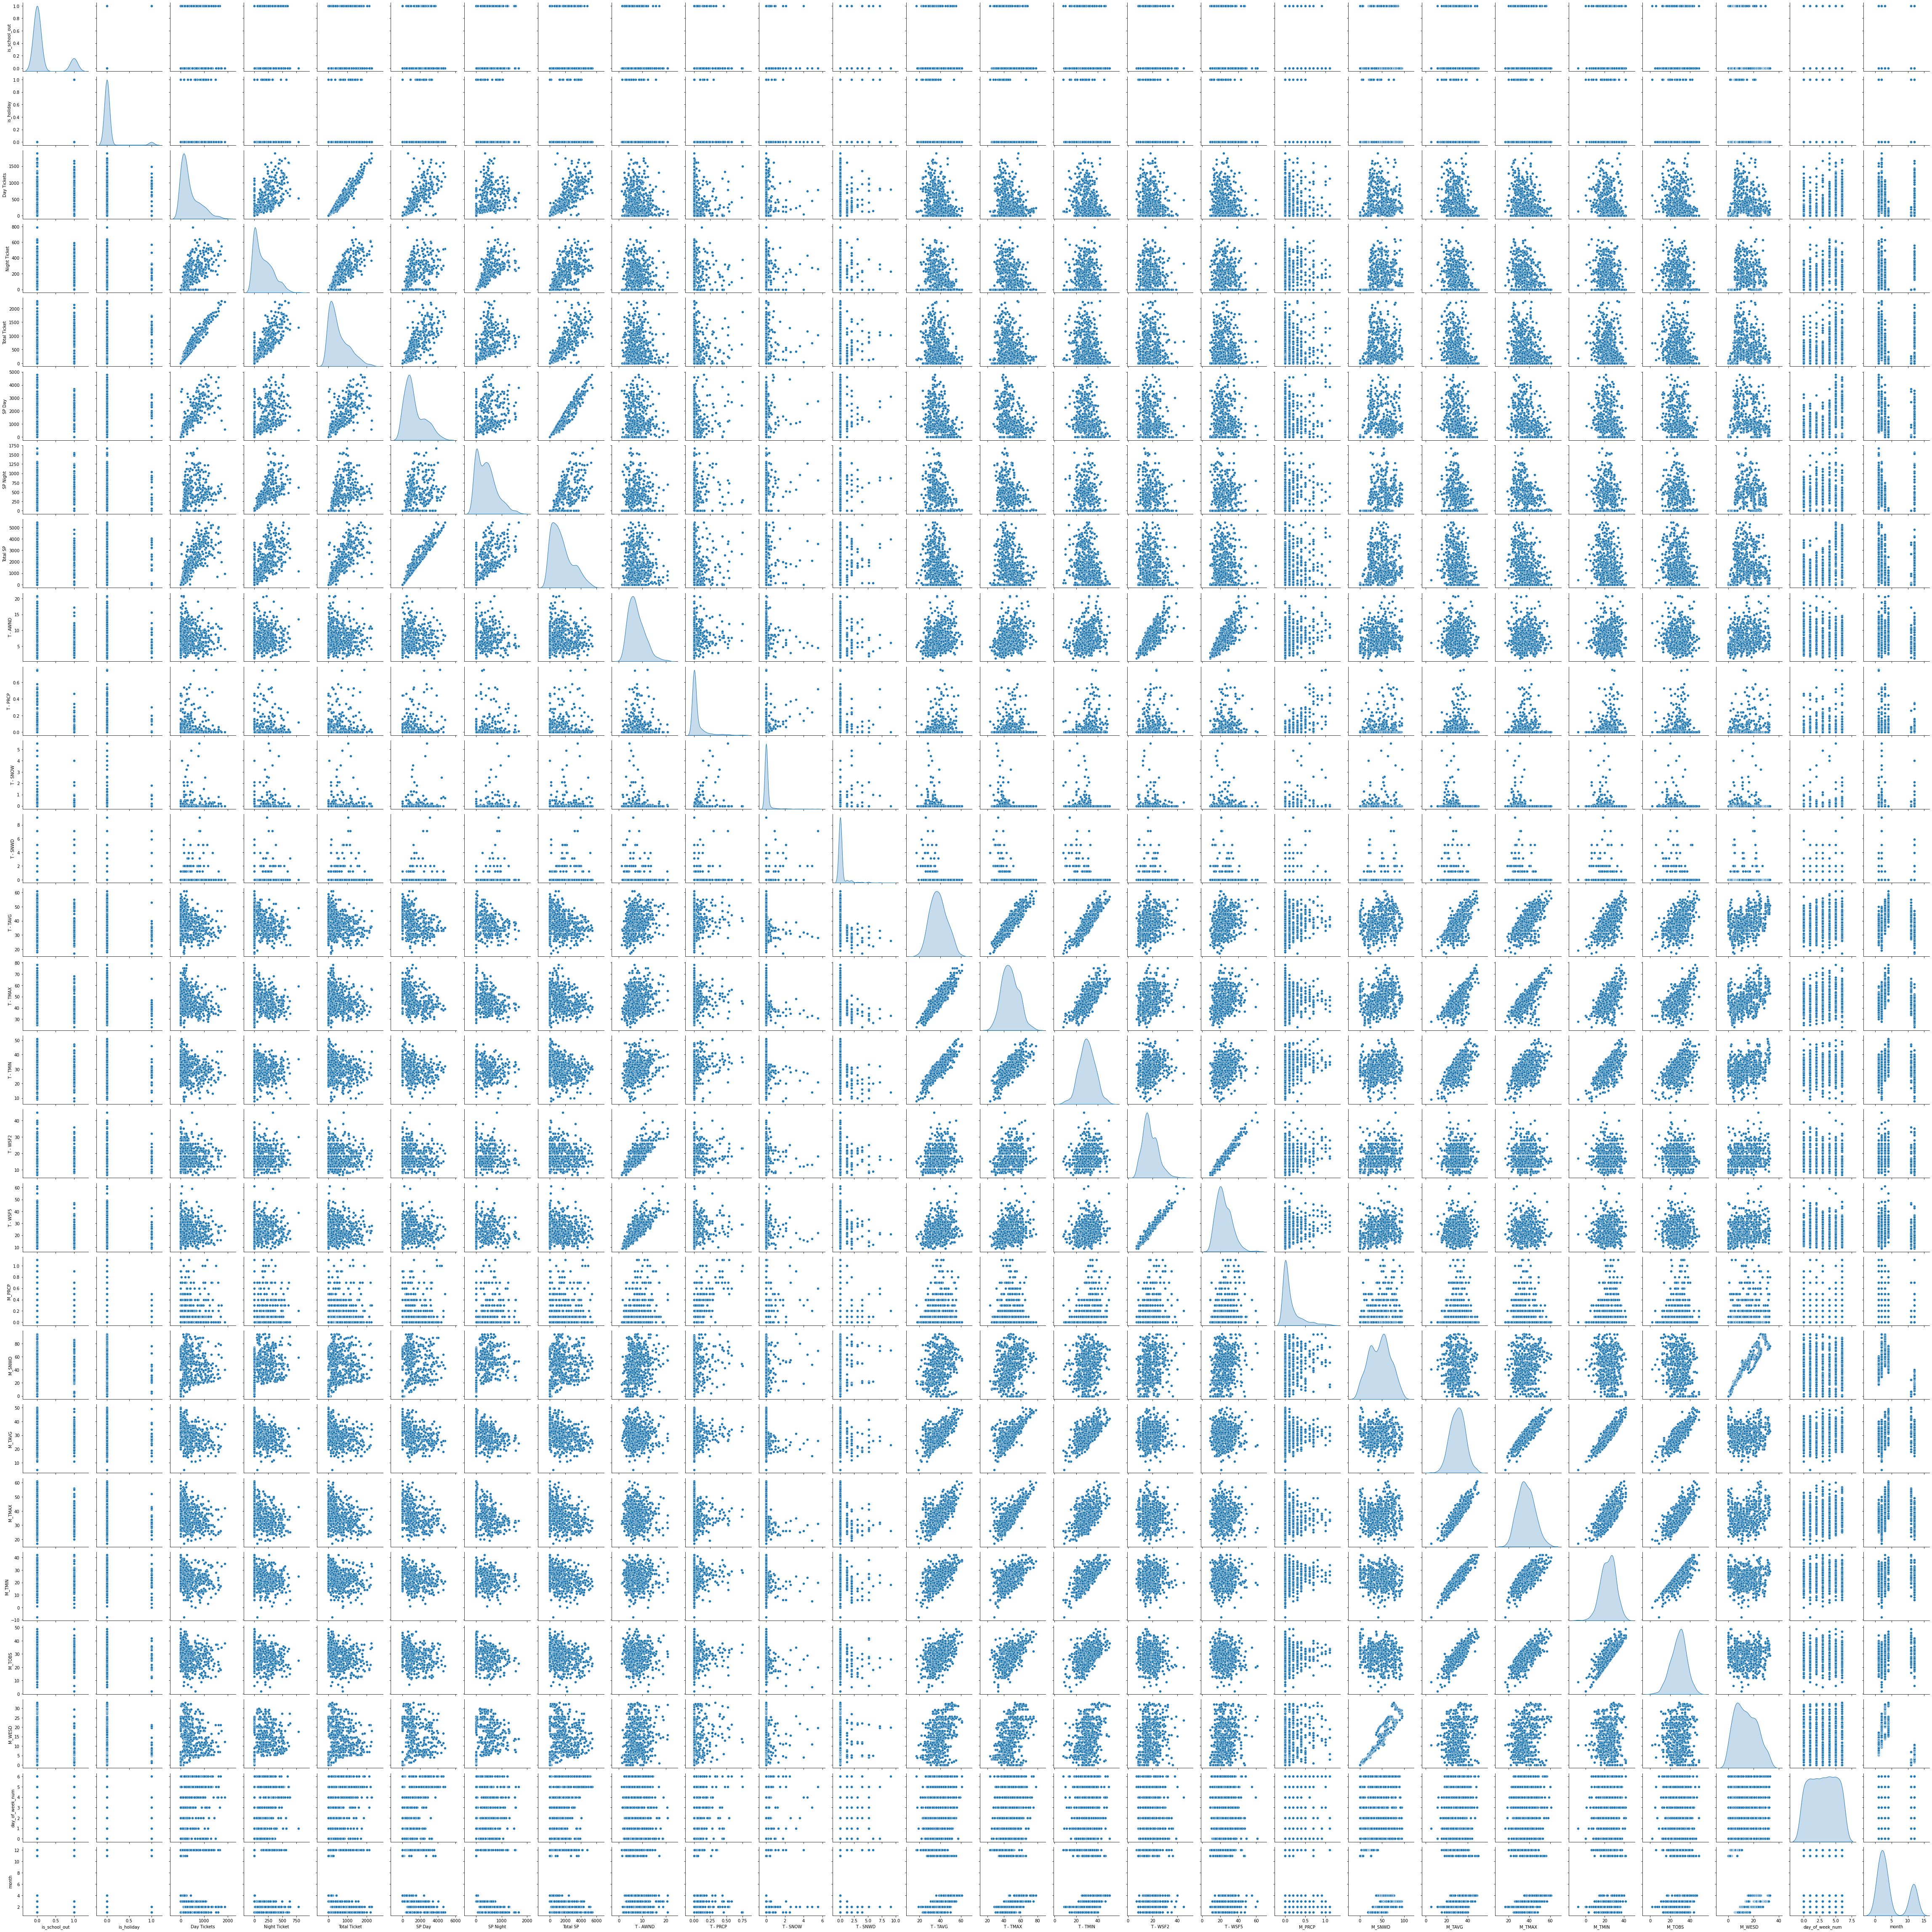

In [9]:
#maybe do a pairplot? 
sns.pairplot(data=df_1_corr, diag_kind='kde')


In [10]:
#identifying the highest correlated variables

df = df_1_corr.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc<1)]


cc
pairs                                 
(T - WSF5, T - WSF2)          0.978815
(Day Tickets, Total Ticket)   0.975263
(SP Day, Total SP)            0.967140
(M_WESD, M_SNWD)              0.953119
(M_TMIN, M_TAVG)              0.924962
(M_TMAX, M_TAVG)              0.912155
(T - TAVG, T - TMAX)          0.911270
(T - TMIN, T - TAVG)          0.902078
(M_TOBS, M_TAVG)              0.861747
(Night Ticket, Total Ticket)  0.838882
(Total SP, Total Ticket)      0.831425
(M_TMIN, M_TOBS)              0.822772
(Total SP, Day Tickets)       0.812933
(T - WSF2, T - AWND)          0.806453
(T - WSF5, T - AWND)          0.799083
(SP Day, Day Tickets)         0.797968
(Total Ticket, SP Day)        0.769974
(M_TMAX, M_TOBS)              0.763902
(SP Night, Night Ticket)      0.758170
(T - TMIN, T - TMAX)          0.756478
(M_TMAX, M_TMIN)              0.753173

### Multicollinairity decision

Based on the information above it makes sense to drop some data, especially the weather data: 

**Weather:** 

- `T_WSF5` (fastest 5 min wind speed in the metropolotan(town) area)
- `M_WESD` (water equivalent snow on the ground on the mountain)
- `M_TMIN` + `T_TMIN` (temperature min on the mountain and in town)
- `M_TMAX` + `T_TMAX` (temperature max on the mountain and in town)
- `T_TOBS` + `M_TOBS` (temperature at time of observation on mtn and in town)
- `T_WSF2` (fastest 2 min wind speend, keeping the average wind speed for town)

**Ticketing:**

To keep things simple I think for now I am going to remove the ticketing and visit informatoin that breaks down season pass vs ticket and night vs day ticketing. I may want to use these as a prediction if there's time or the business need becomes obvious. Unfortunately I don't have pre-sale data to work with. 

- `SP Night`
- `SP Day`
- `Day Tickets`
- `Night Ticket`
- `Total Tickets`
- `Total SP`

In [14]:
df_1_preprocessed = df_1.drop(columns=['T - WSF5', 'M_WESD', 'M_TMIN', 'T - TMIN', 'M_TMAX', 'T - TMAX', 'M_TOBS', 'T - WSF2', 'SP Night', 'SP Day', 'Day Tickets', 'Night Ticket', 'Total Ticket', 'Total SP'])
df_1_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             567 non-null    datetime64[ns]
 1   is_school_out    567 non-null    int64         
 2   is_holiday       567 non-null    int64         
 3   TOTAL_VISITS     567 non-null    float64       
 4   T - AWND         567 non-null    float64       
 5   T - PRCP         567 non-null    float64       
 6   T - SNOW         567 non-null    float64       
 7   T - SNWD         567 non-null    float64       
 8   T - TAVG         567 non-null    int64         
 9   M_PRCP           567 non-null    float64       
 10  M_SNWD           567 non-null    int64         
 11  M_TAVG           567 non-null    int64         
 12  day_of_week_num  567 non-null    int64         
 13  month            567 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(7)

# 0 visit days
Taking a look at rows with 0 visits (these are the days the resort is closed)

In [15]:
df_1_preprocessed[df_1_preprocessed.TOTAL_VISITS == 0]

Date  is_school_out  is_holiday  TOTAL_VISITS  T - AWND  T - PRCP  \
0   2017-11-21              1           0           0.0      7.61      0.05   
1   2017-11-22              1           0           0.0      4.47      0.01   
2   2017-11-23              1           1           0.0      7.16      0.01   
3   2017-11-24              1           0           0.0      6.49      0.26   
4   2017-11-25              0           0           0.0      7.38      0.00   
..         ...            ...         ...           ...       ...       ...   
560 2021-04-12              0           0           0.0      3.80      0.00   
561 2021-04-13              0           0           0.0      6.71      0.00   
562 2021-04-14              0           0           0.0      6.93      0.00   
563 2021-04-15              0           0           0.0      8.28      0.00   
564 2021-04-16              0           0           0.0      6.49      0.00   

     T - SNOW  T - SNWD  T - TAVG  M_PRCP  M_SNWD  M_TAVG  day_of_week_num  \
0         0.0       0.0        49     0.2       7      43                1   
1         0.0       0.0        55     0.1       6      47                2   
2         0.0       0.0        53     0.1       4      49                3   
3         0.0       0.0        53     0.1       4      35                4   
4         0.0       0.0        43     0.2       3      41                5   
..        ...       ...       ...     ...     ...     ...              ...   
560       0.0       0.0        41     0.0      45      32                0   
561       0.0       0.0        47     0.0      43      36                1   
562       0.0       0.0        48     0.0      42      35                2   
563       0.0       0.0        50     0.0      41      38                3   
564       0.0       0.0        53     0.0      40      38                4   

     month  
0       11  
1       11  
2       11  
3       11  
4       11  
..     ...  
560      4  
561      4  
562      4  
563      4  
564      4  

[83 rows x 14 columns]

In [16]:
#dropping the 0 visit days: 
df_1_preprocessed = df_1_preprocessed[df_1_preprocessed.TOTAL_VISITS != 0]
df_1_preprocessed['TOTAL_VISITS'].value_counts()

2203.0    3
978.0     3
715.0     2
1355.0    2
879.0     2
         ..
883.0     1
7144.0    1
5748.0    1
895.0     1
432.0     1
Name: TOTAL_VISITS, Length: 464, dtype: int64

In [18]:
df_1_preprocessed['TOTAL_VISITS'].describe()

count     484.000000
mean     2421.783058
std      1709.932584
min        48.000000
25%      1037.500000
50%      2015.500000
75%      3503.500000
max      7144.000000
Name: TOTAL_VISITS, dtype: float64

## Indexing with Date/Time

In [19]:
#df_1_preprocessed.reset_index(inplace=True)
df_1_preprocessed.set_index('Date', inplace=True)
df_1_preprocessed.head()


is_school_out  is_holiday  TOTAL_VISITS  T - AWND  T - PRCP  \
Date                                                                      
2017-12-21              0           0         432.0     10.07      0.00   
2017-12-22              1           0          48.0      4.47      0.14   
2017-12-23              1           0         266.0      6.93      0.14   
2017-12-24              1           1         283.0      4.70      0.13   
2017-12-25              1           1         281.0      3.36      0.09   

            T - SNOW  T - SNWD  T - TAVG  M_PRCP  M_SNWD  M_TAVG  \
Date                                                               
2017-12-21       0.0       0.0        29     0.0      15      21   
2017-12-22       4.0       0.0        32     0.3      19      24   
2017-12-23       2.1       5.1        32     0.0      23      18   
2017-12-24       1.8       3.9        17     0.3      23      19   
2017-12-25       1.0       5.9        22     0.1      22      26   

            day_of_week_num  month  
Date                                
2017-12-21                3     12  
2017-12-22                4     12  
2017-12-23                5     12  
2017-12-24                6     12  
2017-12-25                0     12

## Some Visuals

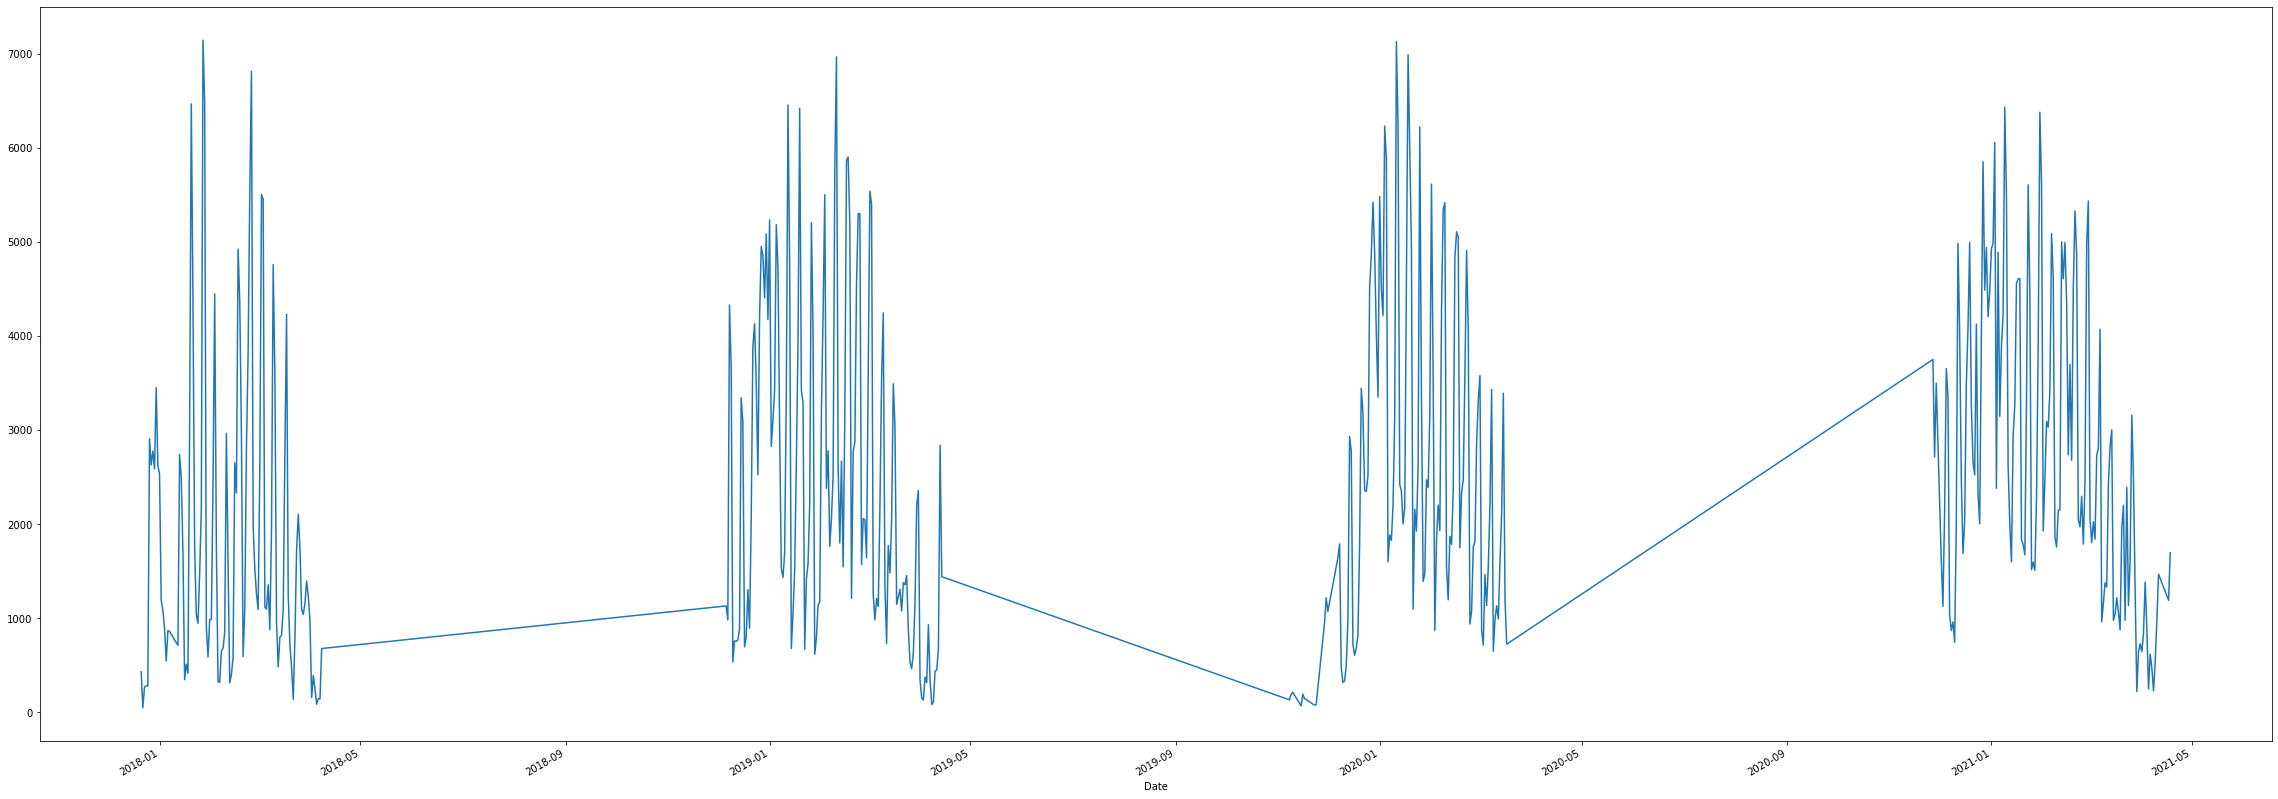

In [20]:
df_1_preprocessed['TOTAL_VISITS'].plot(figsize = (40, 15));

month
1     2482.5
2     2602.0
3     1221.5
4      247.5
11       0.0
12    1687.0
Name: TOTAL_VISITS, dtype: float64
month
1     2571.0
2     2602.0
3     1337.0
4      449.0
11     193.0
12    2525.0
Name: TOTAL_VISITS, dtype: float64


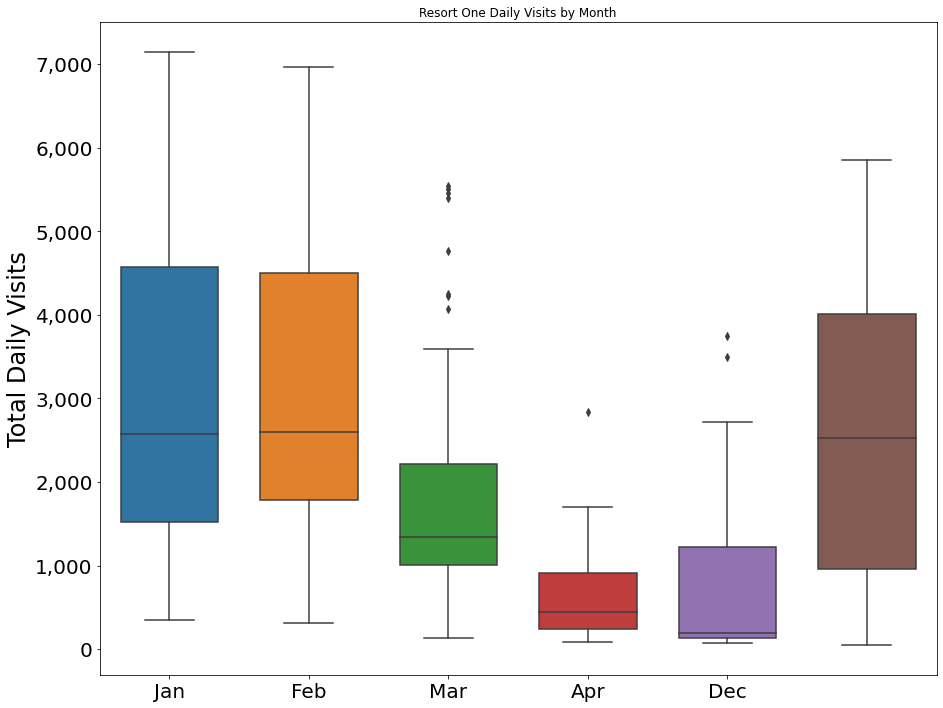

In [31]:
medians = df_1.groupby(['month'])['TOTAL_VISITS'].median()
print(medians)

import matplotlib as mpl

fig, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(x='month', y='TOTAL_VISITS', data=df_1_preprocessed, width=.7)

medians = df_1_preprocessed.groupby(['month'])['TOTAL_VISITS'].median()
print(medians)

ax.set_xlabel("")

ax.set_ylabel("Total Daily Visits", fontsize=24)

ax.set_title("Resort One Daily Visits by Month")

plt.yticks(fontsize=20)

plt.xticks([0, 1, 2, 3, 4], ['Jan', 'Feb', 'Mar', 'Apr', 'Dec'], fontsize=20)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.savefig('Visuals/resort2visits.png', dpi=300);

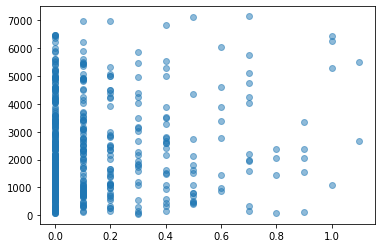

In [32]:
fig, ax = plt.subplots()

ax.scatter(df_1_preprocessed['M_PRCP'], df_1_preprocessed["TOTAL_VISITS"], alpha=0.5)

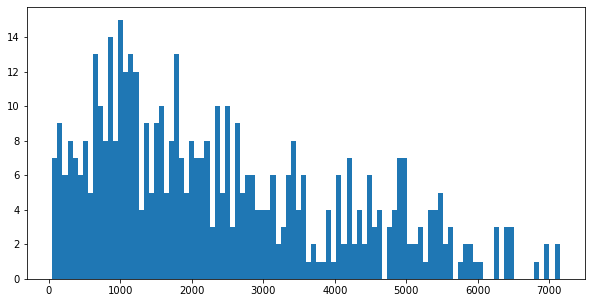

In [33]:
#visualization of target - Visits
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df_1_preprocessed['TOTAL_VISITS'], bins=100);

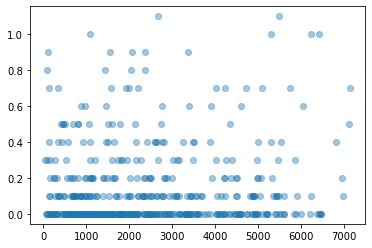

In [34]:
plt.scatter(y=df_1_preprocessed['M_PRCP'], x=df_1_preprocessed['TOTAL_VISITS'], alpha=.4)
plt.savefig('Visuals/resort1precip.png', dpi=300);

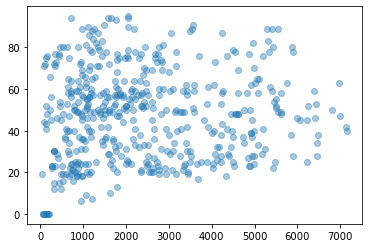

In [57]:
plt.scatter(y=df_1_preprocessed['M_SNWD'], x=df_1_preprocessed['TOTAL_VISITS'], alpha=.4)
plt.savefig('Visuals/resort1msnowdepth.png', dpi=300);

is_holiday
0    2373.318872
1    3393.173913
Name: TOTAL_VISITS, dtype: float64
is_school_out
0    2287.069479
1    3092.024691
Name: TOTAL_VISITS, dtype: float64


<AxesSubplot:xlabel='M_PRCP', ylabel='TOTAL_VISITS'>

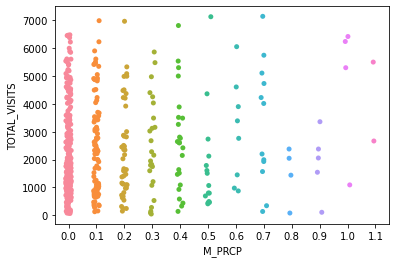

In [37]:
Holiday_averages=df_1_preprocessed.groupby(df_1_preprocessed['is_holiday'])['TOTAL_VISITS'].mean()
print(Holiday_averages)

Schoolout_averages=df_1_preprocessed.groupby(df_1_preprocessed['is_school_out'])['TOTAL_VISITS'].mean()
print(Schoolout_averages)

fig, ax = plt.subplots()
sns.stripplot(x='M_PRCP', y='TOTAL_VISITS', data=df_1_preprocessed)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


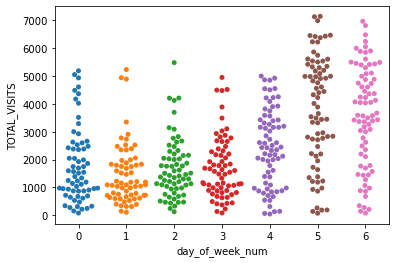

In [40]:
fig, ax = plt.subplots()
sns.swarmplot(x='day_of_week_num', y='TOTAL_VISITS', data=df_1_preprocessed);
plt.savefig('Visuals/resort1dayofweekswarm.png', dpi=300);

# First Simple Model
Linear Regression

In [41]:
#Split into test and train X and Y
X = df_1_preprocessed.drop(columns=['TOTAL_VISITS'])
y = df_1_preprocessed['TOTAL_VISITS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
y.head()

Date
2017-12-21    432.0
2017-12-22     48.0
2017-12-23    266.0
2017-12-24    283.0
2017-12-25    281.0
Name: TOTAL_VISITS, dtype: float64

In [43]:
#Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [44]:
# Print R-Squared and RMSE

from sklearn.metrics import mean_squared_error

# Generate predictions using baseline_model and X_train
y_pred_baseline = linreg.predict(X_train)
print('Training R-Squared:', linreg.score(X_train, y_train))
print('Test R-Squared:', linreg.score(X_test, y_test))
baseline_rmse = mean_squared_error(y_train, y_pred_baseline, squared=False)
baseline_rmse

Training R-Squared: 0.44340117599738904
Test R-Squared: 0.5733045830860857


1263.169663608797

In [45]:
# # Get the cross validated scores for our baseline model
# baseline_cv = cross_val_score(linreg, X_train, y_train, scoring="neg_root_mean_squared_error")

# # Display the average of the cross-validated scores
# baseline_cv_rmse = -(baseline_cv.mean())
# baseline_cv_rmse

# model with OHE and Standard Scaler in a pipeline

In [46]:
#Split into test and train X and Y
X = df_1_preprocessed.drop(columns=['TOTAL_VISITS'])
y = df_1_preprocessed['TOTAL_VISITS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#column transformer - this sets up simmilar to pipeline (scaler and transformer)

cat = ['is_school_out', 'is_holiday', 'day_of_week_num']
non_cat = ['T - AWND', 'T - PRCP', 'T - SNOW', 'T - SNWD', 'T - TAVG', 'M_PRCP', 'M_SNWD', 'M_TAVG']

Transformer = ColumnTransformer([
	('ohe', OneHotEncoder(), cat),
	('scaler', StandardScaler(), non_cat),
	], remainder ='passthrough')


LinRegPipe = Pipeline([('trans', Transformer),
                ('linreg', LinearRegression())])

LinRegPipe.fit(X_train, y_train)


# Generate predictions using baseline_model and X_train
y_pred_LinRegPipe = LinRegPipe.predict(X_train)
y_pred_linRegPipeTest = LinRegPipe.predict(X_test)
print('Training R-Squared:', LinRegPipe.score(X_train, y_train))
print('Test R-Squared:', LinRegPipe.score(X_test, y_test))
LinRegPipe_rmse = mean_squared_error(y_train, y_pred_baseline, squared=False)
LinRegPipe_rmse

Training R-Squared: 0.5213021381012797
Test R-Squared: 0.6304084970623598


1263.169663608797

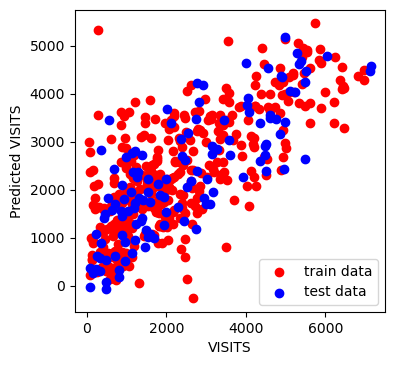

In [47]:
plt.figure(figsize=(4, 4), dpi=100)
plt.xlabel("VISITS")
plt.ylabel("Predicted VISITS")
# plt.xlim(0, 60)
# plt.ylim(0, 60)
plt.scatter(y_train, y_pred_LinRegPipe, lw=1, color="r", label="train data")
plt.scatter(y_test, y_pred_linRegPipeTest, lw=1, color="b", label="test data")
plt.legend()
plt.show()

## Tree Regressor

In [48]:
#Split into test and train X and Y
X = df_1_preprocessed.drop(columns=['TOTAL_VISITS'])
y = df_1_preprocessed['TOTAL_VISITS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#column transformer - this sets up simmilar to pipeline (scaler and transformer)

cat = ['is_school_out', 'is_holiday', 'day_of_week_num']
non_cat = ['T - AWND', 'T - PRCP', 'T - SNOW', 'T - SNWD', 'T - TAVG', 'M_PRCP', 'M_SNWD', 'M_TAVG']

Transformer = ColumnTransformer([
	('ohe', OneHotEncoder(), cat),
	# ('scaler', StandardScaler(), non_cat), #no need to scale on Trees
	], remainder ='passthrough')


TreeRegPipe = Pipeline([('trans', Transformer),
                        ('treereg', DecisionTreeRegressor())])

TreeRegPipe.fit(X_train, y_train)

y_pred_tree = TreeRegPipe.predict(X_train)
print('Training R-Squared:', TreeRegPipe.score(X_train, y_train))
print('Test R-Squared:', TreeRegPipe.score(X_test, y_test))
TreeRegPipe_rmse = mean_squared_error(y_train, y_pred_tree, squared=False)
TreeRegPipe_rmse





Training R-Squared: 1.0
Test R-Squared: 0.6346047980843169


0.0

# ##Decision tree is probably overfitting up there, let's do a grid search: 

In [50]:
#pipeline_2:

X = df_1_preprocessed.drop(columns=['TOTAL_VISITS'])
y = df_1_preprocessed['TOTAL_VISITS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Pipeline first step: Transformer

cat = ['is_school_out', 'is_holiday', 'day_of_week_num']
non_cat = ['T - AWND', 'T - PRCP', 'T - SNOW', 'T - SNWD', 'T - TAVG', 'M_PRCP', 'M_SNWD', 'M_TAVG']

Transformer = ColumnTransformer([
	('ohe', OneHotEncoder(), cat),
	# ('scaler', StandardScaler(), non_cat), #no need to scale on Trees
	], remainder ='passthrough')

#Pipeline second Step: treeregressor
dt_clf2 = DecisionTreeRegressor(random_state = 42)

#pipeline
pipeline_2 = Pipeline([('transformer', Transformer),
						('dtr', dt_clf2)])

#set up grid search paramater grid
dt_param_grid = {
    'dtr__min_samples_split': [2, 4, 6, 8],
    'dtr__max_depth': [None, 2, 3, 4, 5, 6]
}

#set up gridsearch:
gridsearch = GridSearchCV(estimator=pipeline_2,
						  param_grid=dt_param_grid,
						  cv=5)


#fit gridsearch
gridsearch.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch.score(X_test, y_test)

gridsearch_opt_tree = gridsearch.predict(X_train)
print('Training R-Squared:', gridsearch.score(X_train, y_train))
print('Test R-Squared:', gridsearch.score(X_test, y_test))
print("Best Parameter Combination Found During Grid Search:")
print(gridsearch.best_params_)
opt_tree_rmse = mean_squared_error(y_train, gridsearch_opt_tree, squared=False)
opt_tree_rmse

Training R-Squared: 0.7764102069436885
Test R-Squared: 0.6198628879681501
Best Parameter Combination Found During Grid Search:
{'dtr__max_depth': 5, 'dtr__min_samples_split': 4}


800.6017440753235

## Wanna try Random Forests? 

In [51]:
#pipeline_3:
from sklearn.ensemble import RandomForestRegressor

X = df_1_preprocessed.drop(columns=['TOTAL_VISITS'])
y = df_1_preprocessed['TOTAL_VISITS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Pipeline first step: Transformer

cat = ['is_school_out', 'is_holiday', 'day_of_week_num']
non_cat = ['T - AWND', 'T - PRCP', 'T - SNOW', 'T - SNWD', 'T - TAVG', 'M_PRCP', 'M_SNWD', 'M_TAVG']

Transformer = ColumnTransformer([
	('ohe', OneHotEncoder(), cat),
	# ('scaler', StandardScaler(), non_cat), #no need to scale on Trees
	], remainder ='passthrough')

#Pipeline second Step: treeregressor
rfr = RandomForestRegressor(random_state = 42)

#pipeline
pipeline_3 = Pipeline([('transformer', Transformer),
						('dtr', rfr)])

#set up grid search paramater grid
rfr_param_grid = {
    'dtr__n_estimators': [2, 4, 6, 8, 10],
    'dtr__max_depth': [None, 2, 3, 4, 5, 6, 8, 10]
}

#set up gridsearch:
gridsearch2 = GridSearchCV(estimator=pipeline_3,
						  param_grid=rfr_param_grid,
						  cv=5)


#fit gridsearch
gridsearch2.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch2.score(X_test, y_test)

gridsearch2_opt_forest = gridsearch2.predict(X_train)
print('Training R-Squared:', gridsearch2.score(X_train, y_train))
print('Test R-Squared:', gridsearch2.score(X_test, y_test))
print("Best Parameter Combination Found During Grid Search:")
print(gridsearch2.best_params_)
opt_tree_rmse = mean_squared_error(y_train, gridsearch2_opt_forest, squared=False)
opt_tree_rmse

Training R-Squared: 0.9103112494205164
Test R-Squared: 0.6912086542159745
Best Parameter Combination Found During Grid Search:
{'dtr__max_depth': 8, 'dtr__n_estimators': 8}


507.060209936214

#looks like forests have some tradeoff with trees. 

In [52]:
y_pred = gridsearch2.predict(X_test)

df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

Real Values  Predicted Values
Date                                     
2021-02-07       4612.0       4496.925000
2021-04-04        887.0       1453.317029
2019-02-20       2769.0       2480.883883
2021-03-07       4072.0       2861.329167
2020-01-27       1393.0       1775.945557
...                 ...               ...
2018-01-25       1475.0       1582.013301
2018-12-14        883.0       1916.690683
2020-01-02       4496.0       2392.255929
2020-02-10       1546.0       1902.262690
2021-01-15       3268.0       3234.759375

[121 rows x 2 columns]

Gradient Boosting: 

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

#pipeline_4:

X = df_1_preprocessed.drop(columns=['TOTAL_VISITS'])
y = df_1_preprocessed['TOTAL_VISITS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Pipeline first step: Transformer

cat = ['is_school_out', 'is_holiday', 'day_of_week_num']
non_cat = ['T - AWND', 'T - PRCP', 'T - SNOW', 'T - SNWD', 'T - TAVG', 'M_PRCP', 'M_SNWD', 'M_TAVG']

Transformer = ColumnTransformer([
	('ohe', OneHotEncoder(), cat),
	# ('scaler', StandardScaler(), non_cat), #no need to scale on Trees
	], remainder ='passthrough')

#Pipeline second Step: treeregressor
GBR = GradientBoostingRegressor(random_state = 42)

#pipeline
pipeline_4 = Pipeline([('transformer', Transformer),
						('gbr', GBR)])

#set up grid search paramater grid
gbr_param_grid = {
    'gbr__n_estimators': [50, 100, 200, 300],
    'gbr__criterion': ['friedman_mse', 'mse', 'mae']
}

#set up gridsearch:
gridsearch3 = GridSearchCV(estimator=pipeline_4,
						  param_grid=gbr_param_grid,
						  cv=5)


#fit gridsearch
gridsearch3.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch3.score(X_test, y_test)

gridsearch3_opt = gridsearch3.predict(X_train)
print('Training R-Squared:', gridsearch3.score(X_train, y_train))
print('Test R-Squared:', gridsearch3.score(X_test, y_test))
print("Best Parameter Combination Found During Grid Search:")
print(gridsearch3.best_params_)
opt_gbr_rmse = mean_squared_error(y_train, gridsearch3_opt, squared=False)
opt_gbr_rmse


Training R-Squared: 0.9207265831690815
Test R-Squared: 0.7421434636037485
Best Parameter Combination Found During Grid Search:
{'gbr__criterion': 'mse', 'gbr__n_estimators': 100}


476.71007831387107

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

#pipeline_booster:

X = df_1_preprocessed.drop(columns=['TOTAL_VISITS'])
y = df_1_preprocessed['TOTAL_VISITS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Pipeline first step: Transformer

cat = ['is_school_out', 'is_holiday', 'day_of_week_num']
non_cat = ['T - AWND', 'T - PRCP', 'T - SNOW', 'T - SNWD', 'T - TAVG', 'M_PRCP', 'M_SNWD', 'M_TAVG']

Transformer = ColumnTransformer([
	('ohe', OneHotEncoder(), cat),
	# ('scaler', StandardScaler(), non_cat), #no need to scale on Trees
	], remainder ='passthrough')

#Pipeline second Step: treeregressor
GBR = GradientBoostingRegressor(criterion= 'friedman_mse', n_estimators=100, random_state = 42)

#pipeline
pipeline_boost = Pipeline([('transformer', Transformer),
						('gbr', GBR)])

pipeline_boost.fit(X_train, y_train)

# Print the accuracy on test set
print(pipeline_boost.score(X_test, y_test))

boost_pred = pipeline_boost.predict(X_train)
print('Training R-Squared:', pipeline_boost.score(X_train, y_train))
print('Test R-Squared:', pipeline_boost.score(X_test, y_test))

boost_rmse = mean_squared_error(y_train, gridsearch3_opt, squared=False)
boost_rmse

0.7421434636037485
Training R-Squared: 0.9207265831690815
Test R-Squared: 0.7421434636037485


476.71007831387107

In [55]:
y_pred = pipeline_boost.predict(X_test)

df = pd.DataFrame({'Real Visits':y_test, 'Predicted Visits':y_pred, 'Difference': abs(y_test - y_pred)})
df

Real Visits  Predicted Visits   Difference
Date                                                  
2021-02-07       4612.0       4401.585758   210.414242
2021-04-04        887.0       1702.554308   815.554308
2019-02-20       2769.0       2798.581451    29.581451
2021-03-07       4072.0       2969.063866  1102.936134
2020-01-27       1393.0       1974.844747   581.844747
...                 ...               ...          ...
2018-01-25       1475.0       1283.775812   191.224188
2018-12-14        883.0       1837.476221   954.476221
2020-01-02       4496.0       3162.056595  1333.943405
2020-02-10       1546.0       1934.729774   388.729774
2021-01-15       3268.0       3014.339028   253.660972

[121 rows x 3 columns]